# Cyrillic Text Detection with PaddleOCR

This project implements text detection in images containing Cyrillic characters using PaddleOCR with multilingual support.

## Overview

The code provides a complete solution for detecting text regions in images with Cyrillic script. It uses PaddleOCR's text detection model along with angle classification to identify and highlight text areas, without performing recognition (OCR).

## Features

- GPU status verification
- PaddleOCR and Paddle framework version checking
- Text region detection in images
- Support for Cyrillic script (Russian language model)
- Angle classification for rotated text
- Visualization of detected text regions

## Requirements

- Python 3.x
- PaddlePaddle
- PaddleOCR
- PyTorch (for GPU monitoring)
- OpenCV
- Matplotlib
- PIL (Pillow)
- NumPy

## Model Files

The following models are required:
- Multilingual PP-OCRv3 detection model
- Chinese mobile v2.0 classification model
- Cyrillic PP-OCRv3 recognition model (for full OCR functionality)

## Usage

1. Install dependencies:
   ```
   pip install paddlepaddle paddleocr torch matplotlib pillow opencv-python numpy
   ```

2. Download required models:
   - Detection model: https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/Multilingual_PP-OCRv3_det_infer.tar
   - Classification model: https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar
   - Cyrillic recognition model: https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/cyrillic_ppocr_mobile_v2.0_rec_infer.tar

3. Extract the models to your project directory

4. Run the notebook cells sequentially to:
   - Check GPU status
   - Verify Paddle installation
   - Perform text detection and visualize results

## Configuration

The current implementation uses:
- Text detection: Enabled
- Angle classification: Enabled
- Text recognition: Disabled (set `rec=True` to enable)
- Language: Russian (`lang='ru'`)

## References

- [PaddleOCR Multilingual Documentation](https://github.com/PaddlePaddle/PaddleOCR/blob/main/doc/doc_en/multi_languages_en.md)
- [Cyrillic Model Configuration](https://github.com/PaddlePaddle/PaddleOCR/blob/main/configs/rec/PP-OCRv3/multi_language/cyrillic_PP-OCRv3_rec.yml)


GPU = Tesla T4. Max memory = 14.568 GB.
0.0 GB of memory reserved.
Paddle version: 3.0.0-rc1
CUDA enabled: True
Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 GPU.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.
PaddleOCR version: 2.7.0.0
[2025/04/03 14:50:27] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/ubuntu/OCR/model/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/ubuntu/OCR/model/Multilingual_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms

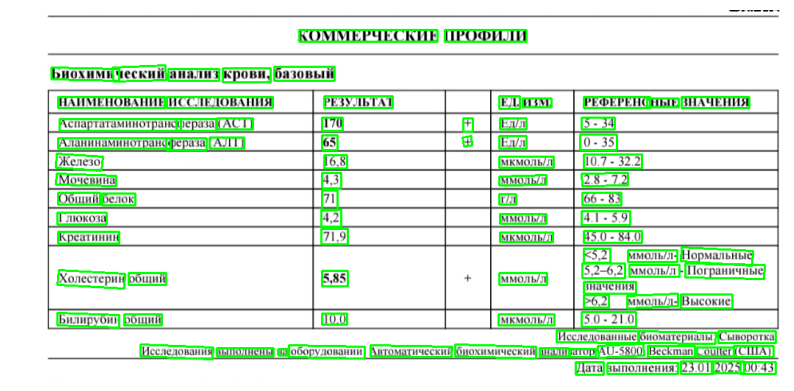

In [5]:
# Check GPU status
import torch 

# Get GPU device properties
gpu_stats = torch.cuda.get_device_properties(0) 
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3) 
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3) 

# Display GPU information
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.") 
print(f"{start_gpu_memory} GB of memory reserved.")

# Verify Paddle installation and configuration
import paddle 

# Check Paddle version and CUDA support
print(f"Paddle version: {paddle.__version__}") 
print(f"CUDA enabled: {paddle.is_compiled_with_cuda()}") 
paddle.utils.run_check() 

# Check PaddleOCR version
import paddleocr 
print(f"PaddleOCR version: {paddleocr.__version__}")

# Cell 3: Text detection using PaddleOCR with Cyrillic model
from paddleocr import PaddleOCR 
import matplotlib.pyplot as plt 
from PIL import Image 
import cv2 
import numpy as np 

# Initialize PaddleOCR with specified model paths
# Using Russian language model for Cyrillic text recognition
ocr = PaddleOCR(     
    use_gpu=False,     
    det_model_dir='/home/ubuntu/OCR/model/Multilingual_PP-OCRv3_det_infer',     
    cls_model_dir='/home/ubuntu/OCR/model/ch_ppocr_mobile_v2.0_cls_infer',     
    use_angle_cls=True,     
    lang='ru' 
)  

# Path to the input image
image_path = '/home/ubuntu/OCR/data/det/train/5.jpg'  

# Text detection with angle classification
# Note: Recognition is disabled (rec=False)
result = ocr.ocr(image_path, cls=True, det=True, rec=False)

# Load the image and convert to RGB
image = Image.open(image_path).convert('RGB') 
image_np = np.array(image)  # Convert PIL Image to NumPy array  

# Extract coordinates of detected text regions
boxes = result[0]  

# Draw bounding boxes around detected text regions
for box in boxes:     
    box = np.array(box, dtype=np.int32)     
    box = box.reshape((-1, 1, 2))  # Reshape array for OpenCV polylines     
    cv2.polylines(image_np, [box], isClosed=True, color=(0, 255, 0), thickness=2)  # Green contours  

# Display the image with bounding boxes
plt.figure(figsize=(10, 10)) 
plt.imshow(image_np) 
plt.axis('off') 
plt.show()